___

<a href='http://www.probayes.com'> <img src='logo.png' /></a>
___



# Objecive
This program is intended to show my knowledge about Python and the different libraries used in data science.


## Introduction
To prepare for the interview that will take place the 28/09/2017, i decided to prepare a project that could help in the different interviews. This project should show some of the capabilities that I have as data scientist.

The project should be original enough in order to proof that is not a copy from the internet. The best idea was to combine it with the research for the appropriate salary for a data scientist.

# Project: Salary for a data scientist and classification of job offers

The project is divided in two principal notebooks:

* Probayes project 1: Read the job offers for data science in the web.
* Probayes project 2: Analyze and classify the data

# Probayes project 2

## Import the different libraries

In [1]:
# Library for data structures and data analysis
import pandas as pd

# Fundamental packages for scientific computing with Python
import numpy as np
import scipy as sp

# Useful constants and classes for string data
import string

# Natural Language Toolkit 
from nltk.corpus import stopwords

# Dataviz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regular expression matching operations
import re

%matplotlib inline

Load the file created by "Probayes project 1"

In [2]:
jobs = pd.read_pickle('data_scientist_data')
jobs.head()

,title,company,location,summary,time,salary,url
0,machine learning data scientist h/f,Cdiscount,Bordeaux (33),"! cdiscount, qui sommes-nous ?\npionnier du e-...",2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=7e0499b01...
1,assistant data scientist h/f,BNP Paribas,Paris (75),bnp paribas est une banque leader de la zone e...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=a41d6a051...
2,stage - data scientist-(h/f),Société Générale,Hauts-de-Seine,environment\n\nau sein de la direction « globa...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=b266c358b...
3,stage - data scientist-(h/f),SG CIB,Hauts-de-Seine,environment\n\nau sein de la direction « globa...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=00fdac5f4...
4,data scientist f/h,GROUPE ASTEK,Boulogne-Billancourt (92),contexte\n\n\nafin d’accompagner un de nos cli...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=fe5e2580c...


# Data preprocessing: Transform and create some features

## Type of contract feature
Create a function capable of recognize the type of contact of the job offer. The web site have the distinction "CDI" and "Temps plein". Therefore, a function is created in order to know the type of contact.

In [3]:
def contact_type (jobs):
    """
    Takes a dataframe with job information, then creates a list of the 
    type of contract based on the title and summary
    """
    list_types= "stage alternance cdd freelance".split()
    for contact in list_types:
        if contact=='stage':
            temp = jobs.title.str.contains(contact).apply(lambda word: contact if word else '')
            temp = temp + jobs.title.str.contains('stagiaire').apply(lambda word: contact if word else '')
            temp = temp + jobs.title.str.contains('intership').apply(lambda word: contact if word else '')
            temp = temp + jobs.title.str.contains('intern').apply(lambda word: contact if word else '')
        elif contact=='alternance':
            temp = temp + jobs.title.str.contains(contact).apply(lambda word: contact if word else '')
            temp = temp + jobs.title.str.contains('alternant').apply(lambda word: contact if word else '')
            temp = temp + jobs.title.str.contains('apprentissage').apply(lambda word: contact if word else '')
        else:
            temp = temp + jobs.title.str.contains(contact).apply(lambda word: contact if word else '')
    return temp.apply(lambda i:'cdi' if i=='' else i)

In [4]:
jobs['contact']=contact_type(jobs)

## Length of the summary
Create a feature of the length of the summary for each job offer

In [5]:
jobs['length'] = jobs['summary'].apply(len)

## Job offers info
See the data of interest

In [6]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 9 columns):
title       363 non-null object
company     357 non-null object
location    363 non-null object
summary     363 non-null object
time        181 non-null object
salary      38 non-null object
url         363 non-null object
contact     363 non-null object
length      363 non-null int64
dtypes: int64(1), object(8)
memory usage: 25.6+ KB


## CDI Job offers info

In [7]:
jobs[(jobs.contact=='cdi')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 362
Data columns (total 9 columns):
title       325 non-null object
company     320 non-null object
location    325 non-null object
summary     325 non-null object
time        160 non-null object
salary      35 non-null object
url         325 non-null object
contact     325 non-null object
length      325 non-null int64
dtypes: int64(1), object(8)
memory usage: 25.4+ KB


# Salary for a data scientist

## Salary feature from string to number
Transform the salary column for the mean of the proposed salary

In [8]:
jobs[(jobs.contact=='cdi')& ~(jobs.salary.isnull())].head()

,title,company,location,summary,time,salary,url,contact,length
12,data scientist / data engineer - h/f,Synchrone,Nantes (44),embarquez pour de nouveaux horizons !synchrone...,2017-08-30,50 000 € - 60 000 € par an,https://www.indeed.fr/voir-emploi?jk=7ca9b0050...,cdi,2615
28,data scientist,Harnham,Paris (75),"paris, france\n45-55k€ / an + avantages\n\nsoc...",2017-08-24,55 000 € par an,https://www.indeed.fr/voir-emploi?jk=e86a03fda...,cdi,1824
34,data scientist sénior (phd) - adtech - h/f,COMPUTER FUTURES,Paris (75),en tant que data scientist senior intégrez un ...,2017-08-24,70 000 € par an,https://www.indeed.fr/voir-emploi?jk=171467ebb...,cdi,772
36,data scientist f/h,ACOSS,Montreuil (93),le poste est à pourvoir à la direction des sta...,2017-08-23,41 000 € - 45 000 € par an,https://www.indeed.fr/voir-emploi?jk=1a4fa42b7...,cdi,1513
41,data scientist - consultant senior,Harnham,Paris (75),"data scientist senior - consultant\nparis, fra...",2017-08-23,60 000 € par an,https://www.indeed.fr/voir-emploi?jk=a58ed95f6...,cdi,1533


In [9]:
print('Only :'+str(len(jobs[(jobs.contact=='cdi')& ~(jobs.salary.isnull())]))+' cdi jobs offers have their proposed salary')

Only :35 cdi jobs offers have their proposed salary


In [10]:
jobs.salary[(jobs.contact=='cdi')& ~(jobs.salary.isnull())]

12      50 000 € - 60 000 € par an
28                 55 000 € par an
34                 70 000 € par an
36      41 000 € - 45 000 € par an
41                 60 000 € par an
46      45 000 € - 54 000 € par an
47                 80 000 € par an
49      38 000 € - 42 000 € par an
52      35 000 € - 50 000 € par an
56                 37 000 € par an
57      26 000 € - 36 000 € par an
63      35 000 € - 45 000 € par an
66      45 000 € - 50 000 € par an
72     50 000 € - 100 000 € par an
76      30 000 € - 50 000 € par an
77      40 000 € - 55 000 € par an
83      40 000 € - 55 000 € par an
86                 50 000 € par an
108     45 000 € - 55 000 € par an
110                55 000 € par an
114     45 000 € - 65 000 € par an
132     70 000 € - 80 000 € par an
151                75 000 € par an
175                17 000 € par an
181     50 000 € - 65 000 € par an
205     45 000 € - 54 000 € par an
220                55 000 € par an
237     40 000 € - 70 000 € par an
244                3

In [11]:
# erase the non-breaking space \xa0 form the data
jobs.salary.replace(u'\xa0',u'', regex=True, inplace=True)

In [12]:
def transform_salary(salary):
    """
    Takes a variable that contais contanis data in 3 different formats:
    * ['\d','€','-','\d','€','par','an'] -> retuns the mean of the range of salary
    * ['\d','€','par','an'] -> retuns the salary
    * nan ->retuns nan
    """
    if type(salary)==list:
        if len(salary)==4:
            temp=float(salary[0])
        elif len(salary)==7:
            temp=(float(salary[0])+float(salary[3]))/2.0
    else:
        temp=np.nan
    return temp

In [13]:
jobs['mean_salary']=jobs.salary.str.split().apply(transform_salary)

## Visualization libraries

In [14]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Salary distribution for Data scientist

In [15]:
jobs.mean_salary[(jobs.contact=='cdi')].iplot(kind='histogram',bins=30)
print("The mean salary for a data scientist in CDI form the data is :"+str(jobs.mean_salary[(jobs.contact=='cdi')].mean()))

The mean salary for a data scientist in CDI form the data is :51557.142857142855


This value is higher with the proposed value given by the site web https://www.indeed.fr/

___

<a href='https://www.indeed.fr/emplois?q=%22Data+Scientist%22&sort=date&start=0'> <img src='salary_data_scientist_france.png' /></a>
___



The differences between the salaries for all the data science jobs and only the CDI are compared

In [16]:
jobs.mean_salary[(jobs.contact=='cdi')].describe()

count       35.000000
mean     51557.142857
std      13119.793885
min      17000.000000
25%      44000.000000
50%      50000.000000
75%      55000.000000
max      80000.000000
Name: mean_salary, dtype: float64

In [17]:
jobs.mean_salary.describe()

count       38.000000
mean     47568.421053
std      18676.334284
min        900.000000
25%      40625.000000
50%      49750.000000
75%      55000.000000
max      80000.000000
Name: mean_salary, dtype: float64

The mean value for all data science jobs correspond to the value proposed by the website. The website claims to have their estimation from 468 offers, this database have only 33 values for the salary for CDI offers.

A study of the salary based in if the title contains the word 'senior' was contemplated but the database did not have enough data.

# What to do with the data?
After differentiate the different types of contact and the analysis of the salaries for the data science job, what other work could be useful to show my capabilities using python.

## Proposition:

* Correlation of the job offers in order to correspond to my CV. This could accelerates the selection of job offers.
* Classify the data science job offers versus engineer’s offers. Some companies do not know what profile they are searching. Therefore, an algorithm that classify the data science job offer from other job offers could be useful.  

# Correlation of the job offers in order to correspond to my CV

The summary of each job offer in CDI is correlated with the text of my CV. 


Read the text file with the contet of the CV

In [18]:
cv_text = open('cv_text.txt', 'r',encoding='utf-8').read()

## Natural Language Processing

In order to transform the text to a vector a function that filter and clean the text is created:

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords (french and english)
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    regex = re.compile('[%s]' % re.escape(string.punctuation+'«'+'»'+'…'+'’'))
    nopunc = regex.sub(' ', mess)

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    # Now just remove any stopwords
    return [word for word in nopunc if word not in stopwords.words('french')]

Create a list with all the job offers and the CV in order to create the bag of words

In [20]:
summarys=jobs.summary.tolist()
summarys.append(cv_text)

In [21]:
# Convert a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Create a bag of words
bow_transformer = CountVectorizer(analyzer=text_process).fit(summarys)

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

9557


In [23]:
# Convert the summary to a matrix of token counts
summary_bow = bow_transformer.transform(summarys)
print(summary_bow.shape)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.
(353, 9557)


In [24]:
print('Shape of Sparse Matrix: ', summary_bow.shape)
print('Amount of Non-Zero occurences: ', summary_bow.nnz)

Shape of Sparse Matrix:  (353, 9557)
Amount of Non-Zero occurences:  58735


In [25]:
# Function that transforms a count matrix to a normalized tf or tf-idf representation
from sklearn.feature_extraction.text import TfidfTransformer

# Fit the matrix to a normalized tf or tf-idf representation
tfidf_transformer = TfidfTransformer().fit(summary_bow)

In [26]:
# Transform the matrix to a normalized tf or tf-idf representation
summary_tfidf = tfidf_transformer.transform(summary_bow)
print(summary_tfidf.shape)

(353, 9557)


The common way of doing this is to transform the documents into tf-idf vectors, then compute the cosine similarity between them

In [27]:
cosine_similarity=((summary_tfidf* summary_tfidf.T).A)[-1]

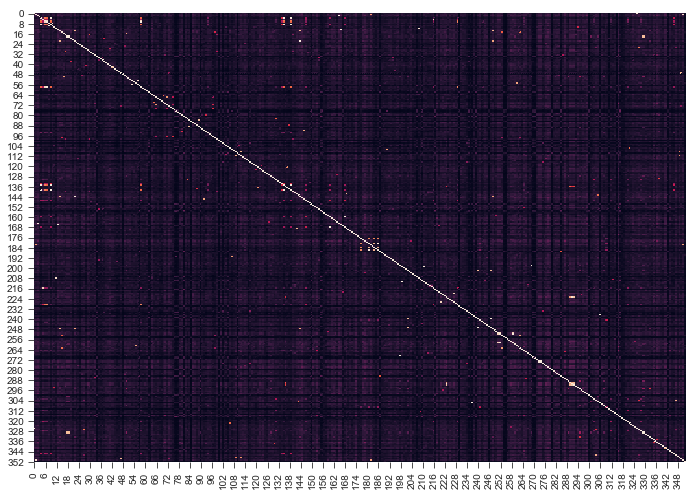

In [28]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(((summary_tfidf* summary_tfidf.T).A),cbar=False)

In [29]:
jobs['similarity']=cosine_similarity[0:-1]

In [30]:
jobs.sort_values('similarity', ascending=False).head()

,title,company,location,summary,time,salary,url,contact,length,mean_salary,similarity
253,senior research data scientist h/f - naval gro...,Michael Page,Var,"en tant que senior research data scientist, vo...",NaN,NaN,https://www.indeed.fr/voir-emploi?jk=7e0f2fad7...,cdi,1872,NaN,0.085298
261,ingénieur de recherche data scientist (h/f),IRT SystemX,France,au sein d’un campus scientifique d’excellence ...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=ac2176035...,cdi,4776,NaN,0.083928
190,(h/f) apprenti(e) data scientist le projet agr...,Bosch,Saint-Ouen (93),"voulez-vous des technologies bénéfiques, model...",NaN,NaN,https://www.indeed.fr/voir-emploi?jk=f9974400c...,cdi,3910,NaN,0.082604
55,ingénieur r&d - data scientist h/f,ADEHOS,Antony (92),adehos est un cabinet de recrutement spécialis...,2017-08-18,45000 € - 50000 € par an,https://www.indeed.fr/voir-emploi?jk=af9b274ef...,cdi,2948,47500.0,0.079361
263,senior research data scientist h/f,DCNS,Ollioules (83),votre principale mission est la recherche et l...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=8fd0ad4f4...,cdi,2611,NaN,0.078692


In [31]:
jobs.sort_values('similarity', ascending=False).tail()

,title,company,location,summary,time,salary,url,contact,length,mean_salary,similarity
311,senior data scientist - natural language proce...,Networkers,Paris (75),the innovation unit of globally renowned compa...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=aae693c82...,cdi,886,NaN,0.002254
230,bioanalyst - data scientist,OmicX,Le Petit-Quevilly (76),omicx is an innovative and dynamic start-up co...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=2ec539ec1...,cdi,1940,NaN,0.001490
271,data scientist,Qwant,Nice (06),"born from an audacious challenge, qwant is the...",NaN,NaN,https://www.indeed.fr/voir-emploi?jk=5a74fd576...,cdi,2756,NaN,0.001441
236,data scientist,engIT,Paris (75),engit jeune société en innovation it propose d...,NaN,40000 € - 55000 € par an,https://www.indeed.fr/voir-emploi?jk=11c5ec479...,cdi,691,47500.0,0.001315
48,data scientist (h/f),Dataswati,Orsay (91),intégrez notre équipe en apportant votre perso...,2017-08-08,NaN,https://www.indeed.fr/voir-emploi?jk=3a390ca89...,cdi,324,NaN,0.000000


In [32]:
print(jobs.url[255])

https://www.indeed.fr/voir-emploi?jk=f0de5dd81e3c7d05


This method it is not efffective to find the job that better correspond to the CV

In [33]:
print(jobs.url[2])

https://www.indeed.fr/voir-emploi?jk=a4a41b16b1d4c73b


# Classify the data science job offers versus engineer’s offers

In order to implement an algorithm of machine learning, the classification of data scientist job offer versus an engineer job offer is implemented

The data from the internet is loaded

In [34]:
jobs_2 = pd.read_pickle('ingenieur_data')

The data is labeled  and concatenated

In [35]:
jobs_2['label']=False
jobs['label']=True

In [36]:
jobs_2=pd.concat([jobs,jobs_2])

In [37]:
jobs_2.reset_index()

,index,company,contact,label,length,location,mean_salary,salary,similarity,summary,time,title,url
0,0,Cdiscount,cdi,True,2585.0,Bordeaux (33),NaN,NaN,0.036388,et venez booster notre trafic et nous aider à ...,2017-08-30,machine learning data scientist h/f,https://www.indeed.fr/voir-emploi?jk=7c4795e21...
1,1,Synchrone,cdi,True,2615.0,Nantes (44),55000.0,50000 € - 60000 € par an,0.020902,embarquez pour de nouveaux horizons !synchrone...,2017-08-30,data scientist / data engineer - h/f,https://www.indeed.fr/voir-emploi?jk=7ca9b0050...
2,2,FORUM TALENTS HANDICAP,cdi,True,2608.0,Rhône,NaN,NaN,0.027006,mission:\nvous êtes un véritable passionné(e) ...,2017-08-30,data scientist (lyon cdi) h/f,https://www.indeed.fr/voir-emploi?jk=a4a41b16b...
3,3,FORUM TALENTS HANDICAP,cdi,True,2763.0,Haute-Garonne,NaN,NaN,0.020560,"sopra steria, fort de plus de 38 000 collabora...",2017-08-30,data scientist cybersécurité h/f,https://www.indeed.fr/voir-emploi?jk=62b55ae93...
4,4,NaN,cdi,True,1898.0,Montrouge (92),NaN,NaN,0.015027,le datalab est au cœur des activités de mon cl...,2017-08-30,data scientist junior secteur banque / assuran...,https://www.indeed.fr/voir-emploi?jk=fa249337c...
5,5,NaN,cdi,True,2204.0,Paris (75),NaN,NaN,0.014200,mp data est une société de conseil tournée ver...,2017-08-30,data scientist junior risque crédit secteur ba...,https://www.indeed.fr/voir-emploi?jk=a88e9c4ec...
6,6,Mp Data,cdi,True,1770.0,Paris (75),NaN,NaN,0.018218,poste et missions : la direction marketing est...,2017-08-30,data scientist attrition & appétences secteur ...,https://www.indeed.fr/voir-emploi?jk=1b1a3db86...
7,7,Mp Data,cdi,True,1673.0,Charente,NaN,NaN,0.020455,poste et missions : la direction marketing est...,2017-08-30,data scientist junior secteur assurance / fina...,https://www.indeed.fr/voir-emploi?jk=cde13e8dc...
8,8,Chauffeur-Privé,cdi,True,2975.0,Paris (75),NaN,NaN,0.011699,job description\n\nambition du poste : vous êt...,2017-08-30,lead data scientist (h/f) - cdi paris,https://www.indeed.fr/voir-emploi?jk=e3155cc04...
9,9,NaN,cdi,True,1903.0,Montrouge (92),NaN,NaN,0.015035,le datalab est au cœur des activités de mon cl...,2017-08-30,data scientist confirmé secteur banque / assur...,https://www.indeed.fr/voir-emploi?jk=b93bc1f27...


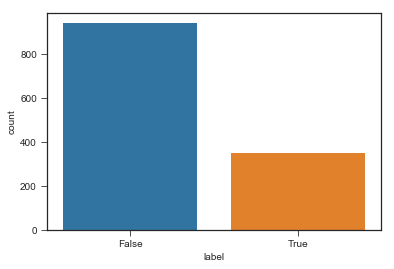

In [38]:
sns.countplot(x='label',data=jobs_2)

In [39]:
jobs_2.label[jobs_2.label==True].count()

352

In [40]:
jobs_2.label[jobs_2.label==False].count()

942

# Classification

Classifier libraries

In [41]:
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

from sklearn import metrics
from sklearn.model_selection import train_test_split

Create a sparse vectorizer from the data

In [42]:
vectorizer = CountVectorizer(analyzer=text_process).fit(jobs_2.summary)

Divide the data in test and train data

In [43]:
summary_train, summary_test, label_train, label_test = train_test_split(jobs_2.summary, jobs_2.label, test_size=0.3)

print(len(summary_train), len(summary_test), len(summary_train) + len(summary_test))

905 389 1294


Extracting features from the training data using a sparse vectorizer

In [44]:
X_train= vectorizer.transform(summary_train)
X_test = vectorizer.transform(summary_test)

In [45]:
def benchmark(clf):
    """
    Takes in a tuple with a classifier function and the name of the classifier then performs the following:
    1. Runs the classifier with the train data
    2. Makes the prediction with the fitted model and the test data
    3. Calculates the F1 score 
    4. Print the Classification report for the model
    5. Returns the name of the classifier and the f1 score
    """
    print('_' * 80)
    print("Training: ")
    print(clf)

    # fit the model
    clf.fit(X_train, label_train)
    # predict the type of job offer with the model
    pred = clf.predict(X_test)
    # calculates the F1 score 
    score = metrics.f1_score(label_test, pred)

    print("Classification report:")
    print(metrics.classification_report(label_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score

In [46]:
classifiers=(
        # Generalized Linear Models
            ## RidgeClassifier: Ordinary Least Squares by imposing a penalty on the size of coefficients
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
            ## Perceptron: Simple algorithm suitable for large scale learning. By default:
                # It does not require a learning rate.
                # It is not regularized (penalized).
                # It updates its model only on mistakes.
        (Perceptron(max_iter=50), "Perceptron"),
            ## PassiveAggressiveClassifier: algorithm for large-scale learning.
                # Similar to the Perceptron (do not require a learning rate). Include a regularization parameter.
        (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
            ## SGDClassifier:
                #This estimator implements regularized linear models with stochastic gradient descent (SGD) learning
        (SGDClassifier(alpha=.0001, max_iter=50,penalty='l1'),"SGDClassifier p=l1"),
        (SGDClassifier(alpha=.0001, max_iter=50,penalty='l2'),"SGDClassifier p=l2"),
        (SGDClassifier(alpha=.0001, max_iter=50,penalty="elasticnet"),"SGDClassifier p=elasticnet"),
        # Nearest Neighbors:
           ## KNeighborsClassifier
               # Find a predefined number of training samples closest in distance
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
            ## NearestCentroid:
                # Nearest centroid classifier
        (NearestCentroid(),"NearestCentroid"),
        #Ensemble Methods
            ## RandomForestClassifier
        (RandomForestClassifier(n_estimators=100), "Random forest"),
        # Support Vector Machines
            ## LinearSVC : Linear Support Vector Classification
        (LinearSVC(penalty='l1', dual=False,tol=1e-3),"LinearSVC p=l1"),
        (LinearSVC(penalty='l2', dual=False,tol=1e-3),"LinearSVC p=l2"),
        # Naive Bayes
            ## MultinomialNB:
                #The multinomial Naive Bayes classifier is suitable for classification with discrete features 
                #(e.g., word counts for text classification)
        (MultinomialNB(alpha=.01),"MultinomialNB"),
            ## BernoulliNB:
                # Like MultinomialNB, this classifier is suitable for discrete data.
        (BernoulliNB(alpha=.01),"BernoulliNB")
)

In [47]:
results = []
for clf, name in classifiers:
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
Classification report:
             precision    recall  f1-score   support

      False       0.97      1.00      0.99       278
       True       1.00      0.93      0.96       111

avg / total       0.98      0.98      0.98       389


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=50, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

      False       0.99      1.00      0.99       278
       True       0.99      0.98      0.99 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:319: UserWarning:

In Ridge, only 'sag' solver can currently fit the intercept when X is sparse. Solver has been automatically changed into 'sag'.



Classification report:
             precision    recall  f1-score   support

      False       1.00      0.99      0.99       278
       True       0.96      0.99      0.98       111

avg / total       0.99      0.99      0.99       389


SGDClassifier p=l2
________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
Classification report:
             precision    recall  f1-score   support

      False       0.99      0.99      0.99       278
       True       0.98      0.97      0.98       111

avg / total       0.99      0.99      0.99       389


SGDClassifier p=elasticnet
______________________________________________________________

In [48]:
results

[('RidgeClassifier', 0.96261682242990654),
 ('Perceptron', 0.98642533936651577),
 ('PassiveAggressiveClassifier', 0.97716894977168944),
 ('SGDClassifier', 0.97777777777777775),
 ('SGDClassifier', 0.97737556561085981),
 ('SGDClassifier', 0.97297297297297303),
 ('KNeighborsClassifier', 0.84374999999999989),
 ('NearestCentroid', 0.93838862559241709),
 ('RandomForestClassifier', 0.96744186046511627),
 ('LinearSVC', 0.95964125560538127),
 ('LinearSVC', 0.97247706422018354),
 ('MultinomialNB', 0.97272727272727277),
 ('BernoulliNB', 0.98181818181818181)]

In [18]:
jobs

,title,company,location,summary,time,salary,url,contact,length,mean_salary
0,machine learning data scientist h/f,Cdiscount,Bordeaux (33),"! cdiscount, qui sommes-nous ?\npionnier du e-...",2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=7e0499b01...,cdi,4452,NaN
1,assistant data scientist h/f,BNP Paribas,Paris (75),bnp paribas est une banque leader de la zone e...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=a41d6a051...,cdi,3342,NaN
2,stage - data scientist-(h/f),Société Générale,Hauts-de-Seine,environment\n\nau sein de la direction « globa...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=b266c358b...,stage,2147,NaN
3,stage - data scientist-(h/f),SG CIB,Hauts-de-Seine,environment\n\nau sein de la direction « globa...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=00fdac5f4...,stage,2147,NaN
4,data scientist f/h,GROUPE ASTEK,Boulogne-Billancourt (92),contexte\n\n\nafin d’accompagner un de nos cli...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=fe5e2580c...,cdi,891,NaN
5,data scientist f/h,ASTEK,Strasbourg (67),contexte du poste\n\n\nastek recrute en cdi de...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=b21ebd449...,cdi,546,NaN
6,data scientist - machine learning expert,L'Oréal,Paris (75),"for more than a century, l’oréal has devoted i...",2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=a725f173c...,cdi,3331,NaN
7,data scientist,Temelio,Paris 9e (75),si vous recherchez un poste dans une structure...,2017-08-31,NaN,https://www.indeed.fr/voir-emploi?jk=9feb5185f...,cdi,1960,NaN
8,data scientist - german speaking,Shift Technology,Paris (75),"not just another start-up, we fight fraud!\nat...",2017-08-30,NaN,https://www.indeed.fr/voir-emploi?jk=002d18d2b...,cdi,3111,NaN
9,data scientist - spanish speaking,Shift Technology,Paris (75),"not just another start-up, we fight fraud!\nat...",2017-08-30,NaN,https://www.indeed.fr/voir-emploi?jk=3769e44b2...,cdi,3112,NaN


In [23]:
jobs[jobs.location.str.contains('69')]

,title,company,location,summary,time,salary,url,contact,length,mean_salary
38,apprentissage - data scientist (h/f),NaN,Lyon (69),la mission :\nce que nous pouvons accomplir en...,2017-08-23,NaN,https://www.indeed.fr/voir-emploi?jk=88dbbc216...,alternance,1269,NaN
87,big data & iot data scientist (f/m),ALSTOM,Villeurbanne (69),the railway industry today is characterized by...,2017-08-07,NaN,https://www.indeed.fr/voir-emploi?jk=d1cab4a2b...,cdi,4418,NaN
95,data scientist (jeune docteur),365Talents,Lyon (69),365talent est une jeune entreprise innovante d...,2017-08-09,NaN,https://www.indeed.fr/voir-emploi?jk=a8fba9cc7...,cdi,2158,NaN
100,data scientist (stage long),365Talents,Lyon (69),365talent est une jeune entreprise innovante d...,2017-08-09,NaN,https://www.indeed.fr/voir-emploi?jk=b4684ba45...,stage,2220,NaN
164,stagiaires data scientist h/f (lyon),Keyrus,Lyon (69),keyrus est un acteur international de la trans...,2017-07-24,NaN,https://www.indeed.fr/voir-emploi?jk=b95d98ffb...,stage,4561,NaN
184,data scientist (h/f),Groupe PANZANI,Lyon (69),"n°1 français des pâtes, des sauces, des pâtes ...",NaN,NaN,https://www.indeed.fr/voir-emploi?jk=f8dffd1ed...,cdi,3052,NaN
276,data scientist senior h/f (lyon),Keyrus,Lyon (69),keyrus emploie à ce jour plus de 2700 collabor...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=492968707...,cdi,3497,NaN
283,data scientist/ingénieur deep learning f/h,Fives Group,Lyon (69),emploi\n\n\ngroupe d’ingénierie industrielle n...,NaN,NaN,https://www.indeed.fr/voir-emploi?jk=e10d9d324...,cdi,3821,NaN
290,data scientist - expertise en statistiques (h/f),Solvay,Saint-Fons (69),"rejoindre solvay, c’est intégrer un leader int...",NaN,NaN,https://www.indeed.fr/voir-emploi?jk=eca94639b...,cdi,4102,NaN
304,data scientist - lead technological player,Harnham,Lyon (69),"data scientist, data science\n\nlyon, france\n...",NaN,55000 € par an,https://www.indeed.fr/voir-emploi?jk=adf6bd25b...,cdi,1042,55000.0
